In [199]:
%matplotlib inline
import os              
import pandas as pd   
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedShuffleSplit

In [200]:
print("Current Working Dir:", os.getcwd())

## collect data     
data_path = '../datasets/Housing.csv'

df = pd.read_csv (data_path, thousands = ',')

Current Working Dir: /home/topol/user2/Hands-On-Machine-Learning-Projects/ML-Project-1


In [201]:
df.head(50)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [202]:
df.shape

(20640, 10)

In [203]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [204]:
df.describe ()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [205]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

#### Ocean proximity column is propably our catagorical attribute, since is repetitive

In [206]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### convert this catagorical attribute into simple numeric:
#### `<1H OCEAN == 0`, `INLAND == 1`, `NEAR OCEAN == 2`, `NEAR BAY == 3`, `ISLAND == 4` 

In [207]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [208]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [209]:
## check missing values
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [210]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [211]:
## total beds got a lot of missing values
df.isna().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [212]:
## fill all missing values with the mean
numb_column = df.select_dtypes(include= ['int64', 'float64']).columns
for column in numb_column:
    df[column] = df[column].fillna(df[column].mean())
    
df['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [213]:
df.columns[df.isna().sum() > 0]

Index([], dtype='object')

In [214]:
df.isna().sum().sum()

0

In [215]:
## Look at the correlations between every pair of attributes using corr()
corr_matrix = df.drop(['ocean_proximity'], axis= 1).corr()
sorted_corr = corr_matrix['median_house_value'].sort_values(ascending= False)
print(sorted_corr)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


#### Data Visualization to understand and gain insights about data

### Plots

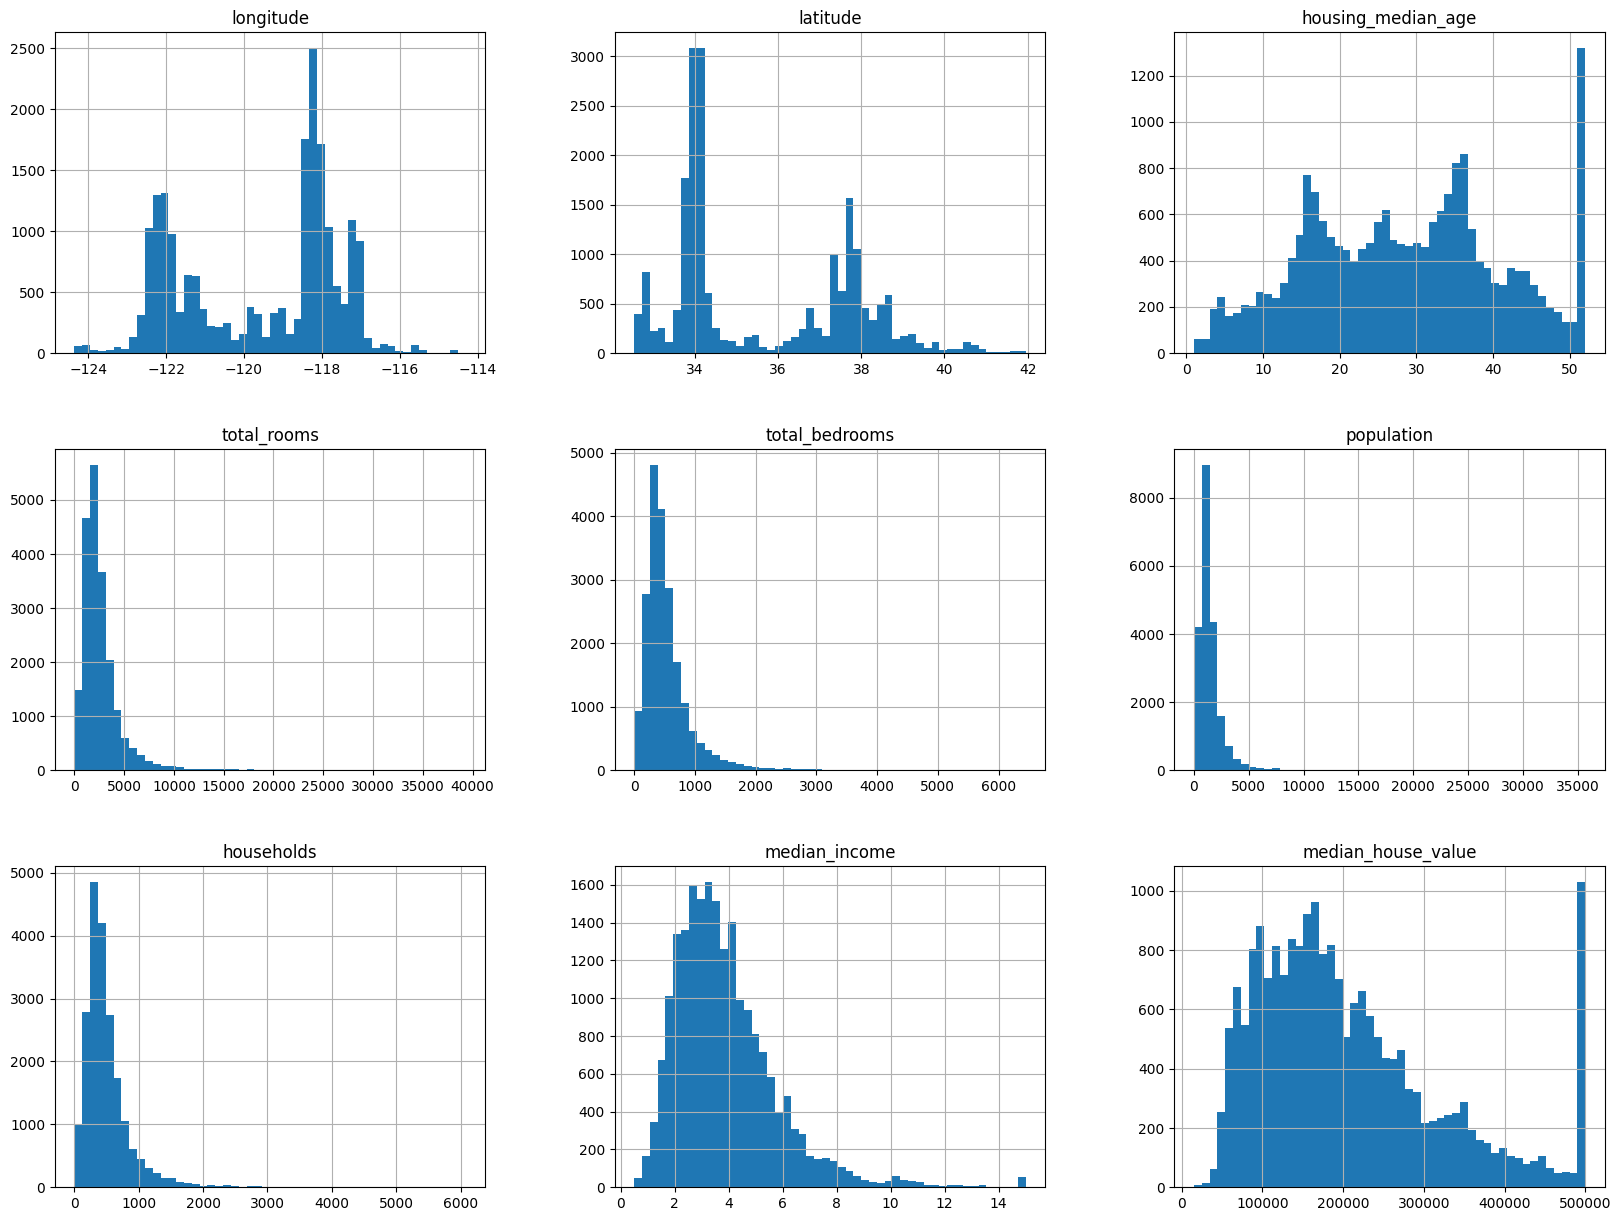

In [216]:
## plot all atributes
df.hist(bins= 50, figsize= (20, 15))


plt.show ()

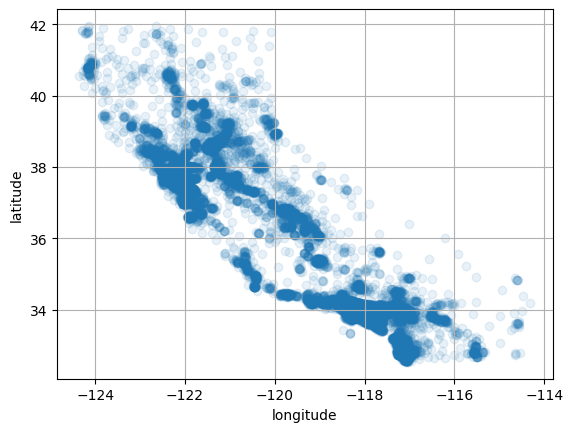

In [217]:
## lets look at geographical information
plt.scatter(df['longitude'], df['latitude'], alpha= 0.1)   # alpha for transparency to see better the density
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid()

plt.show()

#### lets look at prices

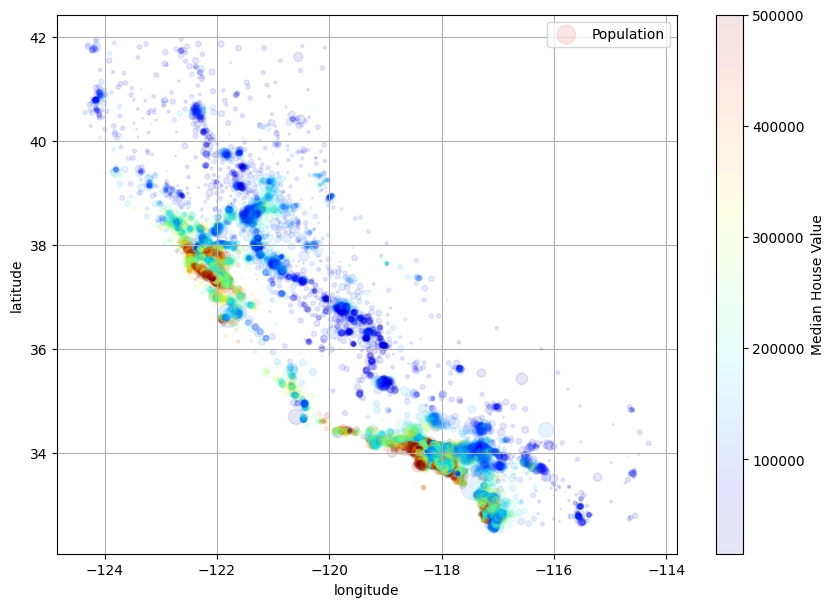

In [218]:
## colormap option cmap - jet to represents the price: blue(low) and red(high prices)
plt.figure(figsize= (10,7))
plt.scatter(df['longitude'], df['latitude'], alpha= 0.1,
            s= df['population']/100, label= 'population', 
            c= df['median_house_value'], 
            cmap= 'jet')  
              
# add colorbar
plt.colorbar(label='Median House Value')        
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid()
plt.legend(['Population'], loc='upper right')

plt.show()

#### We can create a new income catagorory column, with 5 catagories labeled 1-5
#### This is important in predicting the median housing prices

In [219]:
## use cut() from pandas
df['income_cat'] = pd.cut(df['median_income'], 
                          bins= [0, 1.5, 3.0, 4.5, 6, np.inf],
                          labels= [1, 2, 3, 4, 5])

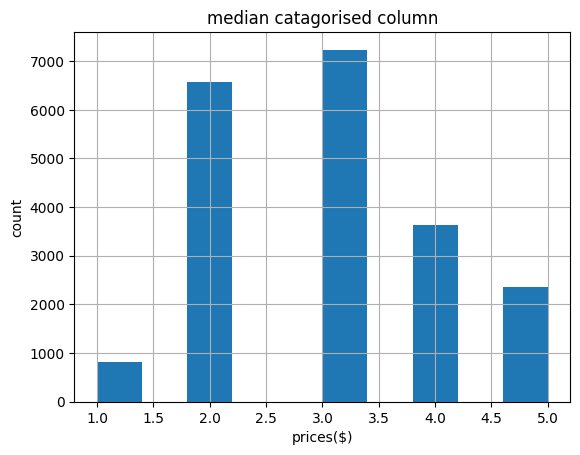

In [220]:
df['income_cat'].hist()
plt.title('median catagorised column')
plt.xlabel('prices($)')
plt.ylabel('count')

plt.show()

#### Now lets create a Test and trainning sets

In [221]:
#y = df['ocean_proximity']
#X = df.drop(y, axis= 1)

In [222]:
## the model will use 80 % of data to train and the remaining 20 % == 0.2 as test set
train_set, test_set = train_test_split (df, test_size = 0.2, random_state = 42)

split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)

for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [223]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis= 1, inplace= True)